In [405]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [406]:
df = pd.read_csv('insurance.csv')
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [407]:
print(df.shape)

(1338, 7)


In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [409]:
df.isna()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [410]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [411]:
print(df['age'].mean())
print(df['age'].median())

39.20702541106129
39.0


In [412]:
print(df['bmi'].mean())
print(df['bmi'].median())

30.663396860986538
30.4


In [413]:
print(df['children'].mean())
print(df['children'].median())

1.0949177877429
1.0


In [414]:
print(df['sex'].value_counts())

male      676
female    662
Name: sex, dtype: int64


In [415]:
print(df['smoker'].value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


In [416]:
print(df['region'].value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [417]:
print(df.select_dtypes(include=['object']).columns.values)

['sex' 'smoker' 'region']


In [418]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


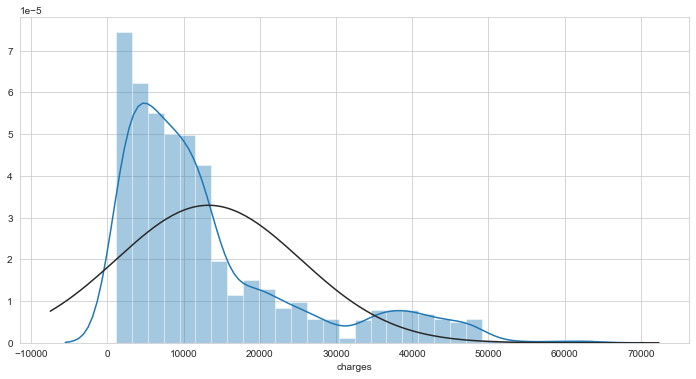

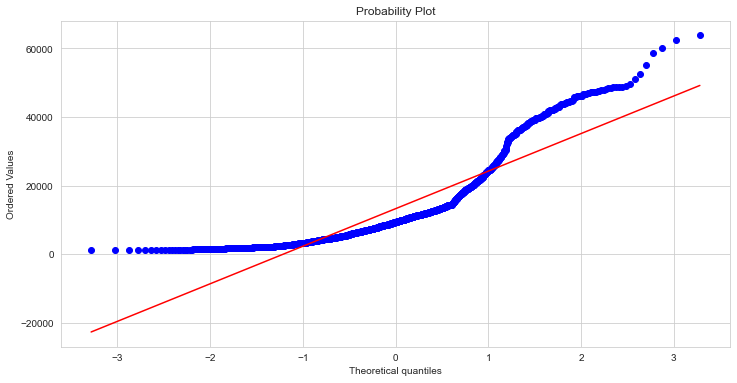

In [537]:
from scipy.stats import norm
from scipy import stats
plt.figure(figsize=(12,6))
sns.distplot(df['charges'], fit=norm)
fig = plt.figure(figsize=(12,6))
res = stats.probplot(df['charges'], plot=plt)

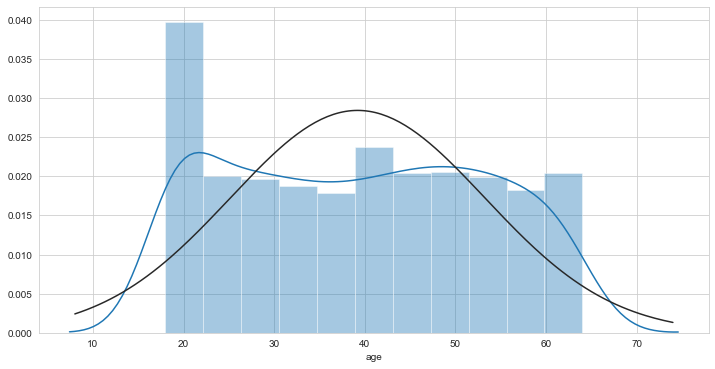

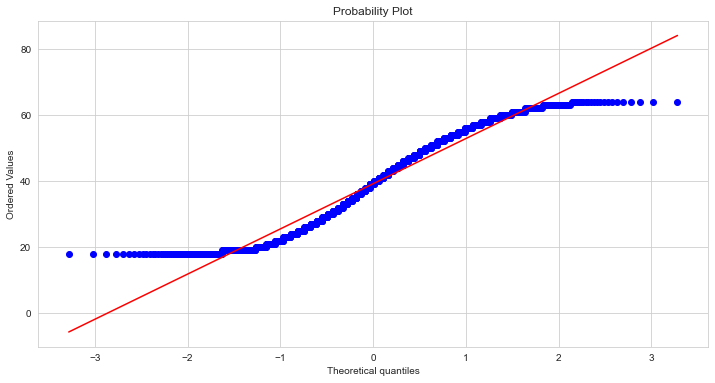

In [536]:
plt.figure(figsize=(12,6))
sns.distplot(df['age'], fit=norm)
fig = plt.figure(figsize=(12,6))
res = stats.probplot(df['age'], plot=plt)

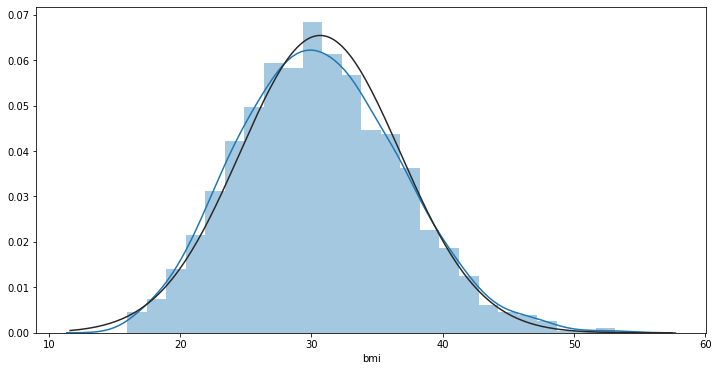

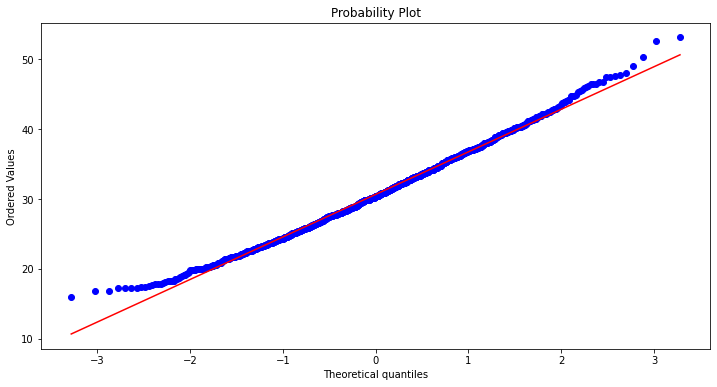

In [421]:
plt.figure(figsize=(12,6))
sns.distplot(df['bmi'], fit=norm)
fig = plt.figure(figsize=(12,6))
res = stats.probplot(df['bmi'], plot=plt)

In [422]:
df.corr()['charges'].sort_values() 

children    0.067998
bmi         0.198341
age         0.299008
charges     1.000000
Name: charges, dtype: float64

<AxesSubplot:>

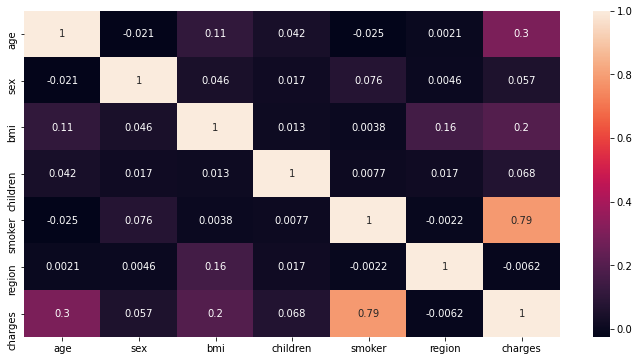

In [448]:
fig = plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)

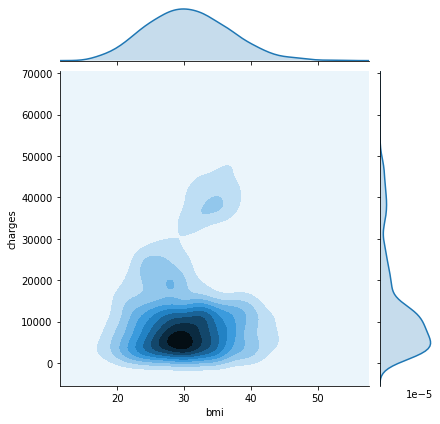

In [424]:
sns.jointplot(x='bmi', y='charges', data=df, kind='kde')

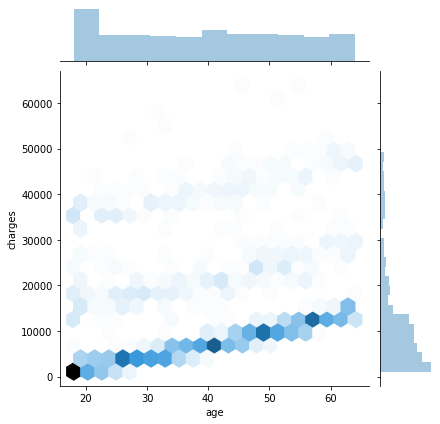

In [425]:
sns.jointplot(x='age', y='charges', data=df, kind='hex')

In [426]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print(x) # It extracts Salary,Age, Country as X

[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 ...
 [18 'female' 36.85 0 'no' 'southeast']
 [21 'female' 25.8 0 'no' 'southwest']
 [61 'female' 29.07 0 'yes' 'northwest']]


In [427]:
print(y)

[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [428]:
# catColumns = ['sex', 'smoker', 'region']
# df_dum = pd.get_dummies(df, columns = catColumns, drop_first=False)
# df_dum.head()

In [449]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
df['sex']= label_encoder.fit_transform(df['sex']) 
df['smoker']= label_encoder.fit_transform(df['smoker']) 
df['region']= label_encoder.fit_transform(df['region']) 

In [450]:
print(df)

      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]


In [451]:
 x = df.drop(['charges'], axis = 1)
 y = df.charges
from sklearn.model_selection import train_test_split

In [452]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [454]:
 y_log_train = np.log1p(y_train)

In [455]:
from sklearn.linear_model import LinearRegression

In [456]:
lr = LinearRegression()

In [457]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [461]:
coeff_df = pd.DataFrame(lm1.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,257.056264
sex,-18.791457
bmi,335.781491
children,425.091456
smoker,23647.818096
region,-271.284266


In [462]:
print(x_train)

      age  sex     bmi  children  smoker  region
560    46    0  19.950         2       0       1
1285   47    0  24.320         0       0       0
1142   52    0  24.860         0       0       2
969    39    0  34.320         5       0       2
486    54    0  21.470         3       0       1
...   ...  ...     ...       ...     ...     ...
1095   18    0  31.350         4       0       0
1130   39    0  23.870         5       0       2
1294   58    1  25.175         0       0       0
860    37    0  47.600         2       1       3
1126   55    1  29.900         0       0       3

[1070 rows x 6 columns]


In [463]:
print(x_test)

      age  sex     bmi  children  smoker  region
764    45    0  25.175         2       0       0
887    36    0  30.020         0       0       1
890    64    0  26.885         0       1       1
1293   46    1  25.745         3       0       1
259    19    1  31.920         0       1       1
...   ...  ...     ...       ...     ...     ...
109    63    1  35.090         0       1       2
575    58    0  27.170         0       0       1
535    38    1  28.025         1       0       0
543    54    0  47.410         0       1       2
846    51    0  34.200         1       0       3

[268 rows x 6 columns]


In [464]:
y_pred = lr.predict(X_test) 

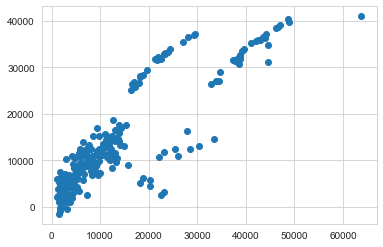

In [557]:
plt.scatter(y_test, y_pred)

In [466]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [467]:
mae = mean_absolute_error(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

33635210.431178406
4186.508898366434
5799.587091438356


<AxesSubplot:xlabel='charges'>

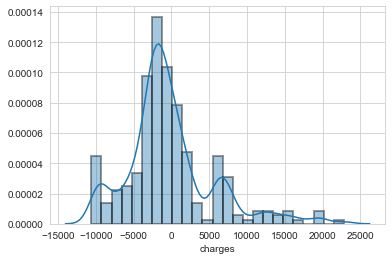

In [555]:
sns.distplot((y_test-y_pred), hist_kws=dict(edgecolor="k", linewidth=2))

C:\Users\Acer\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


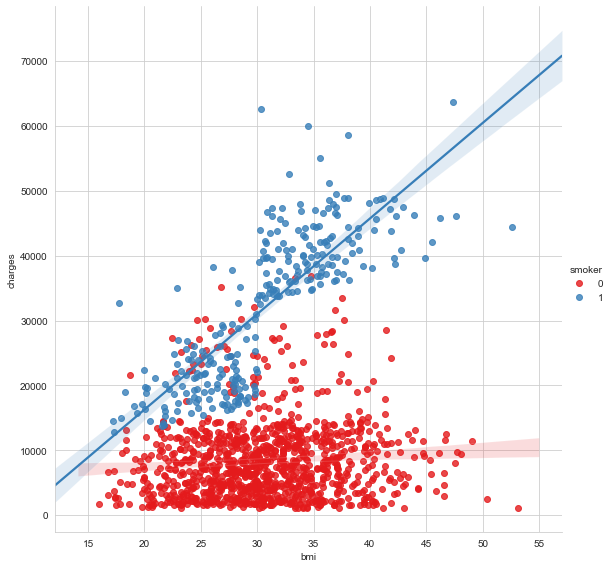

In [552]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, size = 8, palette="Set1")

<AxesSubplot:xlabel='region', ylabel='charges'>

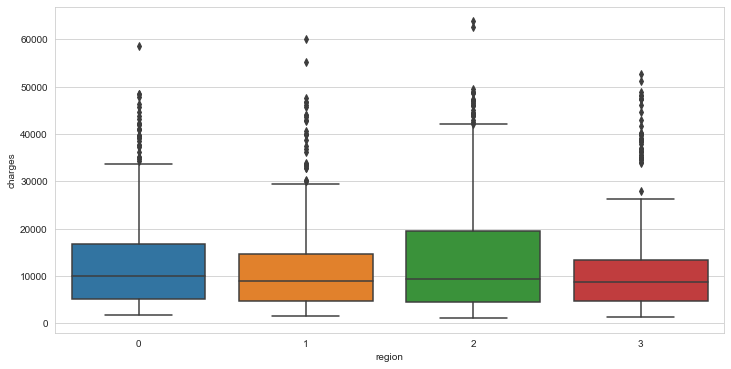

In [554]:
plt.figure(figsize=(12,6))
sns.boxplot(x='region', y = 'charges', data = df)

<AxesSubplot:xlabel='sex', ylabel='charges'>

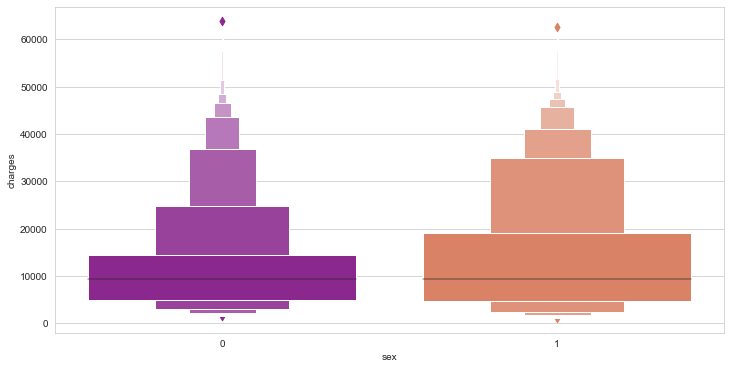

In [513]:
# Set theme
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.boxenplot(x='sex', y='charges', data=df, palette ="plasma")
# sns.boxplot(x='sex', y = 'charges', data = df)

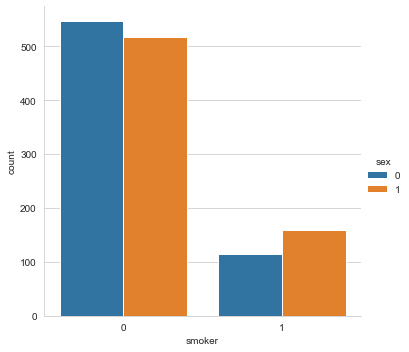

In [546]:
sns.catplot(x="smoker", kind="count",hue = 'sex', data=df)

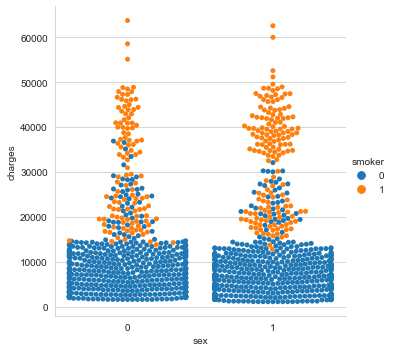

In [544]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="swarm", data=df)

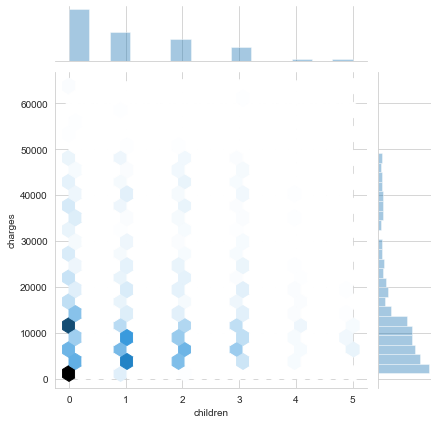

In [559]:
sns.jointplot(x='children', y='charges', data=df, kind='hex')